# Groups pubs with > 1000 impressions into the top/bottom 10 on legit traffic

select split_part(domain,'.',-2) as publisher, count(*) as impressions,
sum(automated_browser) as automated, sum(data_center_traffic) as data_center, sum(incongruous_browser) as incongruous
from arion.prod.fact_moat_viewability
where split_part(domain,'.',-2) in (select replace(website_url,'.com','') from pub_property_iab)
group by split_part(domain,'.',-2)
order by sum(automated_browser) desc;

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('D:\\Kargo\\Pub Analysis\\pub-non-human.csv')
df.head()

,PUBLISHER,IMPRESSIONS,AUTOMATED,DATA_CENTER,INCONGRUOUS
0,thedailybeast,77524694,3494,384430,98231
1,loudwire,10646041,1918,86300,67043
2,time,26559874,1233,117131,40782
3,screencrush,3459176,1231,17770,18984
4,starmagazine,1159748,1225,2923,13046


In [34]:
df["RATIO_AUTOMATION"] = df["AUTOMATED"] / df["IMPRESSIONS"]
df["RATIO_DATA_CENTER"] = df["DATA_CENTER"] / df["IMPRESSIONS"]
df["RATIO_INCONGRUOUS"] = df["INCONGRUOUS"] / df["IMPRESSIONS"]

nzc_df = df[(df["RATIO_INCONGRUOUS"] > 0.0) & (df["IMPRESSIONS"] > 1000)]
nzd_df = df[(df["RATIO_DATA_CENTER"] > 0.0) & (df["IMPRESSIONS"] > 1000)]
nza_df = df[(df["RATIO_AUTOMATION"] > 0.0) & (df["IMPRESSIONS"] > 1000)]

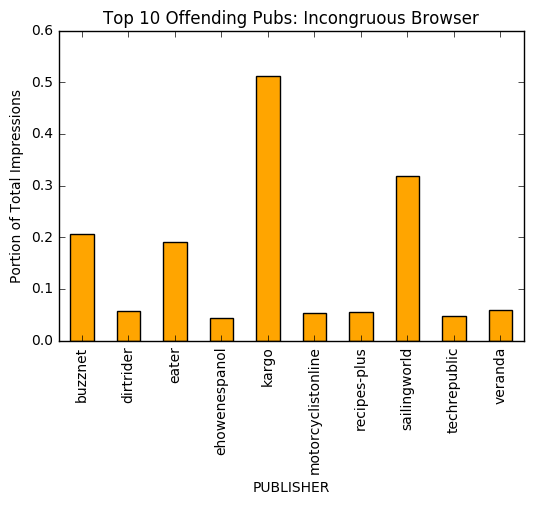

In [76]:
sorted_df = nzc_df.sort("RATIO_INCONGRUOUS", ascending=False)[:10]

sorted_df.pivot_table("RATIO_INCONGRUOUS", "PUBLISHER").plot(kind="bar", color="orange", title="Top 10 Offending Pubs: Incongruous Browser").set_ylabel("Portion of Total Impressions")

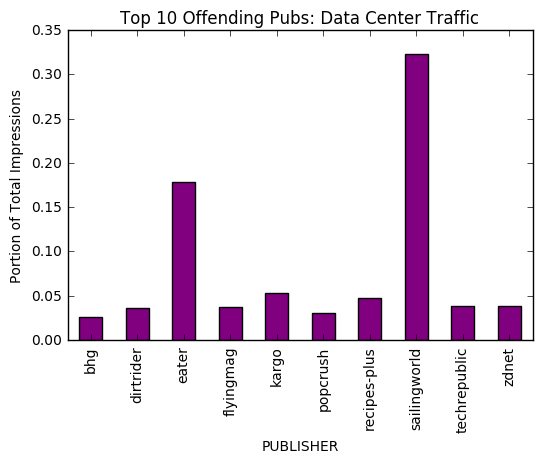

In [77]:
sorted_df = nzd_df.sort("RATIO_DATA_CENTER", ascending=False)[:10]

sorted_df.pivot_table("RATIO_DATA_CENTER", "PUBLISHER").plot(kind="bar", color="purple", title="Top 10 Offending Pubs: Data Center Traffic").set_ylabel("Portion of Total Impressions")

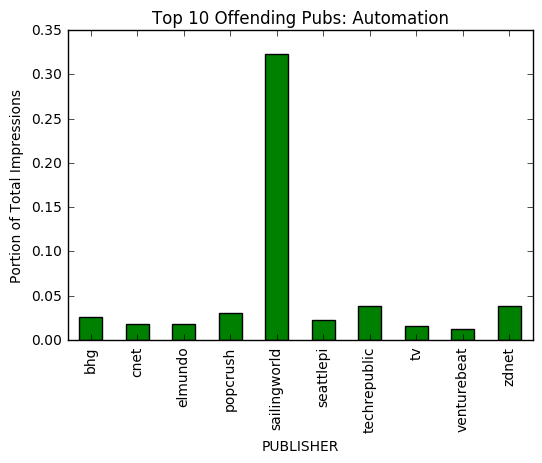

In [79]:
sorted_df = nza_df.sort("RATIO_DATA_CENTER", ascending=False)[:10]

sorted_df.pivot_table("RATIO_DATA_CENTER", "PUBLISHER").plot(kind="bar", color="green", title="Top 10 Offending Pubs: Automation").set_ylabel("Portion of Total Impressions")

# Lowest Incongruous Browser Pubs (Good)
Browser pretending to be another browser

In [35]:
nzc_df.sort("RATIO_INCONGRUOUS", ascending=True)[:10]

,PUBLISHER,IMPRESSIONS,AUTOMATED,DATA_CENTER,INCONGRUOUS,RATIO_AUTOMATION,RATIO_DATA_CENTER,RATIO_INCONGRUOUS
260,refinery29,251765,0,371,2,0.000000e+00,0.001474,0.000008
54,google,52438297,122,147152,2191,2.326544e-06,0.002806,0.000042
285,flipboard,228550,0,427,10,0.000000e+00,0.001868,0.000044
105,scarymommy,65864651,20,90442,4168,3.036530e-07,0.001373,0.000063
173,jezebel,420821,0,839,42,0.000000e+00,0.001994,0.000100
199,utvdriver,16875,0,21,2,0.000000e+00,0.001244,0.000119
277,sbnation,37592,0,69,5,0.000000e+00,0.001835,0.000133
155,thenest,3352431,2,9096,460,5.965820e-07,0.002713,0.000137
290,csnnw,108607,0,549,15,0.000000e+00,0.005055,0.000138
107,people,220829375,19,291642,32717,8.603928e-08,0.001321,0.000148


# Highest Incongruous Browser Pubs

In [43]:
nzc_df.sort("RATIO_INCONGRUOUS", ascending=False)[:10]

,PUBLISHER,IMPRESSIONS,AUTOMATED,DATA_CENTER,INCONGRUOUS,RATIO_AUTOMATION,RATIO_DATA_CENTER,RATIO_INCONGRUOUS
267,kargo,6773,0,361,3464,0.000000,0.053300,0.511442
132,sailingworld,5889,6,1902,1873,0.001019,0.322975,0.318051
239,buzznet,16541,0,251,3428,0.000000,0.015174,0.207243
327,eater,1584,0,282,301,0.000000,0.178030,0.190025
331,veranda,395818,0,2995,23583,0.000000,0.007567,0.059580
345,dirtrider,45686,0,1634,2630,0.000000,0.035766,0.057567
196,recipes-plus,292477,0,13705,16331,0.000000,0.046858,0.055837
167,motorcyclistonline,33403,1,326,1781,0.000030,0.009760,0.053319
101,techrepublic,441770,24,17095,20821,0.000054,0.038697,0.047131
62,ehowenespanol,1396942,77,11345,60683,0.000055,0.008121,0.043440


# Lowest Data Center Pubs (Good)
Traffic coming from a data center

In [37]:
nzd_df.sort("RATIO_DATA_CENTER", ascending=True)[:10]

,PUBLISHER,IMPRESSIONS,AUTOMATED,DATA_CENTER,INCONGRUOUS,RATIO_AUTOMATION,RATIO_DATA_CENTER,RATIO_INCONGRUOUS
203,movietickets,10692,0,7,17,0.000000e+00,0.000655,0.001590
287,iheart,1299,0,1,3,0.000000e+00,0.000770,0.002309
183,babygaga,5906406,0,4638,1094,0.000000e+00,0.000785,0.000185
172,elclasificado,4401745,0,3662,655,0.000000e+00,0.000832,0.000149
214,motoamerica,6885,0,6,0,0.000000e+00,0.000871,0.000000
166,univision,187308,1,168,169,5.338800e-06,0.000897,0.000902
344,kcci,418634,0,401,67,0.000000e+00,0.000958,0.000160
184,netmums,304265,0,303,206,0.000000e+00,0.000996,0.000677
81,intouchweekly,291511337,44,317765,124242,1.509375e-07,0.001090,0.000426
313,peopleenespanol,9261653,0,10099,2665,0.000000e+00,0.001090,0.000288


# Highest Data Center Pubs

In [72]:
nzd_df.sort("RATIO_DATA_CENTER", ascending=False)[:10]

,PUBLISHER,IMPRESSIONS,AUTOMATED,DATA_CENTER,INCONGRUOUS,RATIO_AUTOMATION,RATIO_DATA_CENTER,RATIO_INCONGRUOUS
132,sailingworld,5889,6,1902,1873,0.001019,0.322975,0.318051
327,eater,1584,0,282,301,0.000000,0.178030,0.190025
267,kargo,6773,0,361,3464,0.000000,0.053300,0.511442
196,recipes-plus,292477,0,13705,16331,0.000000,0.046858,0.055837
101,techrepublic,441770,24,17095,20821,0.000054,0.038697,0.047131
26,zdnet,779689,362,29617,27958,0.000464,0.037986,0.035858
318,flyingmag,18762,0,700,631,0.000000,0.037309,0.033632
345,dirtrider,45686,0,1634,2630,0.000000,0.035766,0.057567
10,popcrush,3754422,800,114463,19684,0.000213,0.030488,0.005243
17,bhg,7961916,483,203179,214356,0.000061,0.025519,0.026923


# Lowest Automation Pubs (Good)
Traffic coming from automated sources

In [39]:
nza_df.sort("RATIO_INCONGRUOUS", ascending=True)[:10]

,PUBLISHER,IMPRESSIONS,AUTOMATED,DATA_CENTER,INCONGRUOUS,RATIO_AUTOMATION,RATIO_DATA_CENTER,RATIO_INCONGRUOUS
54,google,52438297,122,147152,2191,2.326544e-06,0.002806,0.000042
105,scarymommy,65864651,20,90442,4168,3.036530e-07,0.001373,0.000063
155,thenest,3352431,2,9096,460,5.965820e-07,0.002713,0.000137
107,people,220829375,19,291642,32717,8.603928e-08,0.001321,0.000148
134,momtastic,753725,5,1190,178,6.633719e-06,0.001579,0.000236
149,fieldandstream,473830,2,668,124,4.220923e-06,0.001410,0.000262
126,diynetwork,81340157,8,172924,22608,9.835240e-08,0.002126,0.000278
96,firstforwomen,54125528,28,93100,15801,5.173160e-07,0.001720,0.000292
136,littlethings,315230090,3,591565,99446,9.516858e-09,0.001877,0.000315
84,thebump,4479768,41,10455,1539,9.152260e-06,0.002334,0.000344


# Highest Automation Pubs

In [40]:
nza_df.sort("RATIO_INCONGRUOUS", ascending=False)[:10]

,PUBLISHER,IMPRESSIONS,AUTOMATED,DATA_CENTER,INCONGRUOUS,RATIO_AUTOMATION,RATIO_DATA_CENTER,RATIO_INCONGRUOUS
132,sailingworld,5889,6,1902,1873,0.001019,0.322975,0.318051
167,motorcyclistonline,33403,1,326,1781,0.000030,0.009760,0.053319
101,techrepublic,441770,24,17095,20821,0.000054,0.038697,0.047131
62,ehowenespanol,1396942,77,11345,60683,0.000055,0.008121,0.043440
26,zdnet,779689,362,29617,27958,0.000464,0.037986,0.035858
17,bhg,7961916,483,203179,214356,0.000061,0.025519,0.026923
144,seattlepi,63022,3,1399,1202,0.000048,0.022199,0.019073
39,elmundo,1914929,201,35352,30391,0.000105,0.018461,0.015871
52,extratv,4625680,147,9313,68756,0.000032,0.002013,0.014864
146,stereogum,836116,2,4697,12176,0.000002,0.005618,0.014563
